<a href="https://colab.research.google.com/github/Krishan-Kumar-kk/Loan-prediction/blob/Krishan-Kumar-kk-patch-1/Black_frilday_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv("/content/test.csv")

In [71]:
train_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [73]:
train=train_df        #coping data into another datafrom 
test=test_df

In [74]:
train.drop(['User_ID','Product_ID'],axis=1,inplace=True)     

drop 'User_ID'and 'Product_ID' because they do not affect our analysis.

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [76]:
train.describe(include='all')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [77]:
import sklearn
from sklearn.impute import SimpleImputer 
imputer= SimpleImputer(missing_values=np.nan,strategy='mean' )
imputer=imputer.fit(train.iloc[:,7:9])
train.iloc[:,7:9]=imputer.transform(train.iloc[:,7:9])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


So, the available datatypes are : int64, float64 and objects. We will leave the numeric datatypes alone and focus on object datatypes as the cannot be directly put into a Machine Learning Model

**Let's get Gender first.**

In [78]:
train.Gender.unique()

array(['F', 'M'], dtype=object)

In [79]:
def map_gender(gender):
  if gender=='M':
    return 1
  else:
    return 0

In [80]:
train['Gender']=train['Gender'].apply(map_gender)

**convert age range into another variable**

In [81]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [82]:
def map_age(Age):
  if  Age=='0-17':
    return 0
  elif Age=='18-25':
    return 1
  elif Age=='26-35':
    return 2
  elif Age=='36-45':
    return 3
  elif Age=='46-50':
    return 4
  elif Age=='51-55':
    return 5
  else:
    return 6

train['Age']=train['Age'].apply(map_age)


change the category of city_category in dumiess variable

In [83]:
train.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [84]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
train['City_Category']=train['City_Category'].apply(map_city_categories)

In [85]:
train.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [115]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace('4+','4')

In [116]:
train.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

array([0, 1])

In [117]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,2,0,3,9.842329,12.668243,9.032409
1,0,0,10,2,2,0,1,6.000000,14.000000,9.629051
2,0,0,10,2,2,0,12,9.842329,12.668243,7.259820
3,0,0,10,2,2,0,12,14.000000,12.668243,6.963190
4,1,6,16,0,4,0,8,9.842329,12.668243,8.983314


# EDA

**univariant analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


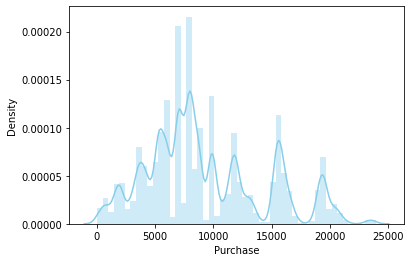

In [89]:
sns.distplot( train["Purchase"] , color="skyblue", label="Sale")


in purchase column the **mean > median**  so data is right skewed 

In [90]:
train["Purchase"]=np.log(train['Purchase'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


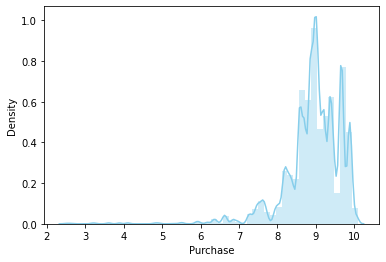

In [91]:
sns.distplot( train["Purchase"] , color="skyblue", label="Sale")

In [92]:
 train["Purchase"].mean()

8.939353690990398

In [93]:
 train["Purchase"].median()  #y=np.array(train["Purchase"])
                              #c=np.exp(y)

8.993054630146133

After taking log now mode and median are nearly equal and data is normly distributed

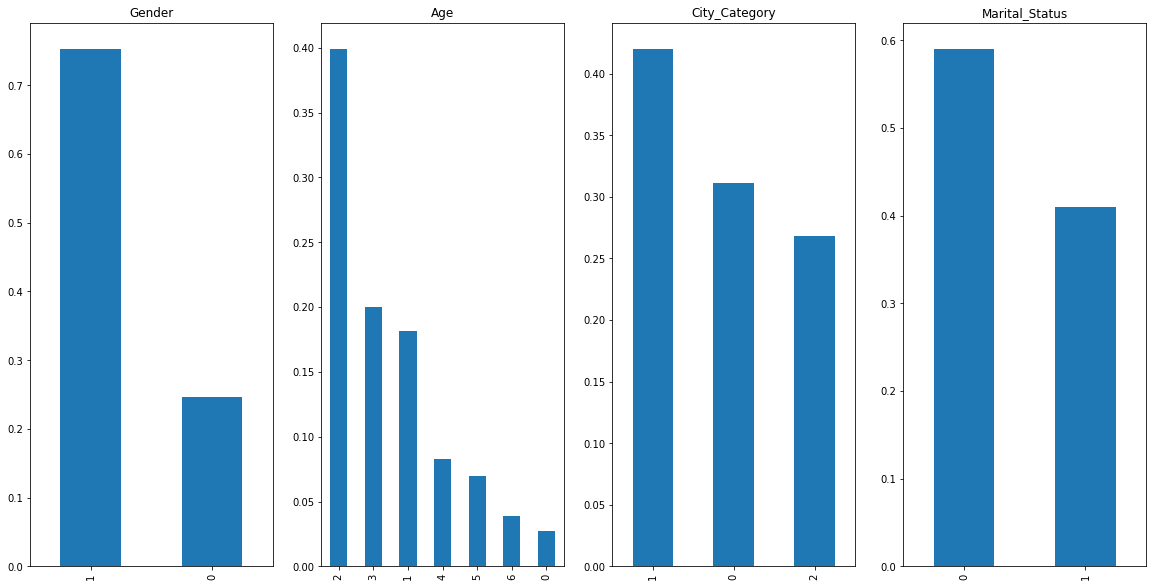

In [110]:
plt.figure(1)
plt.subplot(141)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(142)
train['Age'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Age')
plt.subplot(143)
train['City_Category'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='City_Category')
plt.subplot(144)
train['Marital_Status'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Marital_Status')

observation :
1= On Black friday sale 75% are male and 25% are female are coming for shop.
2= maximum person are coming in age range of '26-35' around 40%.
3= maximum people are coming form city B.
4= maximum people are married arround 60%.

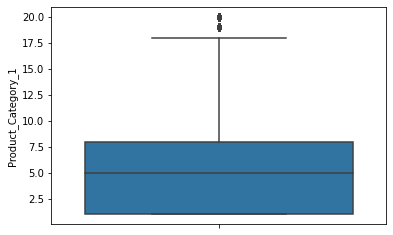

In [119]:
sns.boxplot(y=train['Product_Category_1'])

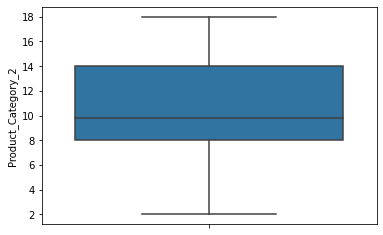

In [120]:
sns.boxplot(y=train['Product_Category_2'])

# Bivariant analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


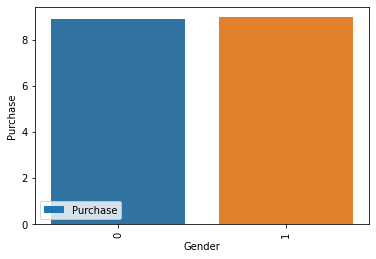

In [128]:
train[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = train)
plt.show()

It looks like that men tend to spend more on Black Friday although women are not far behind.



```
# Let's see how Age affects the Purchase. Of the top of my head I can say that people of higher age will tend to spen more as they would have more income. Let's see where this gets us.
```



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


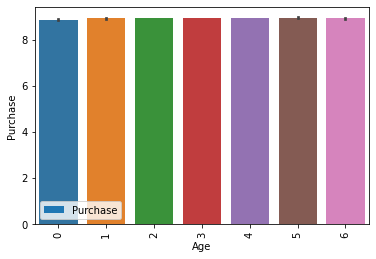

In [129]:
train[['Age','Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data = train)
plt.show()



```
# I will also plot some boxplots to study the deviation in Age vs Purchase
```



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


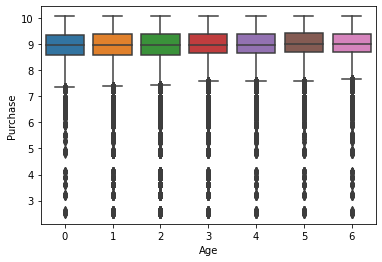

In [130]:
sns.boxplot('Age','Purchase', data = train)
plt.show()



```
Not much of a deciation there. We can say that no matter what age group you belong to, you are gonna make full use of your purchasing power on a Black Friday. Maybe, because everything is so damn cheap
```



*Lets see how city category affects the purchase.*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


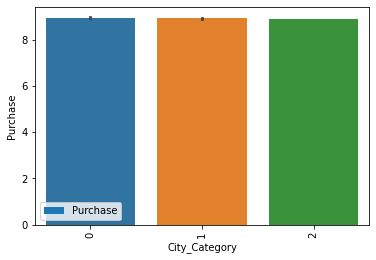

In [131]:
train[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data = train)
plt.show()

*`Okay so, the people belonging to category 0 tend to spend a little more. These may be the more developed cities that we are talking about here.`*

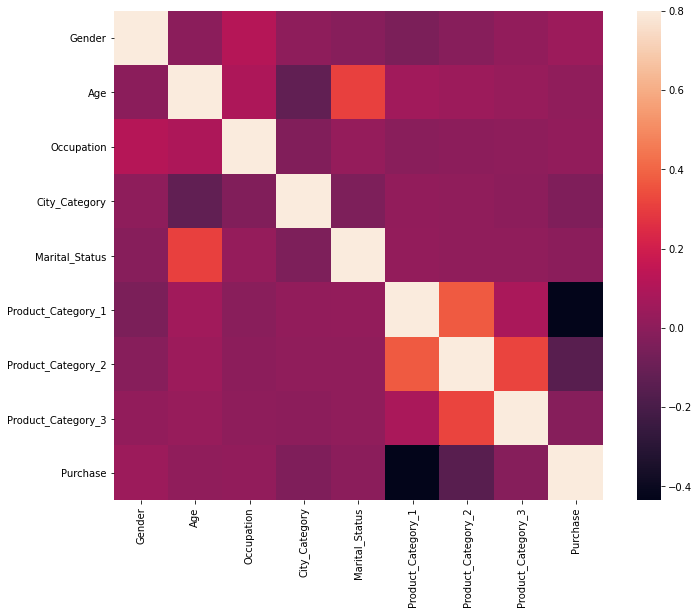

In [132]:
corrmat = train.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)



```
It can be seen that nothing is highly correlated with the Purchase variable. Although a few conclusions can be drawn:

Product_Category_1 has a negative correlation with Purchase.
Maritial_Status and Age are strongly correlated. As Expected.
Product_Category_3 has a strong correlation with Purchase. Maybe the products in this category were cheap. Let's chrun out some number related to this.
```

